In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})

In [3]:
d_mu, d_sigma = 30, 10
price_min = 20
price_high = 300

def demand(t):
      return np.random.normal(d_mu, d_sigma)

def price(t):
    p_low = price_min + np.abs(np.sin(t)) * np.random.random() * 180
    p_high = price_high - np.abs(np.sin(t)) * np.random.random() * 100
    if np.random.random() >= 0.6:
        p_final = 20 + np.random.random() * 10
    else:
        p_final = np.random.uniform(low=p_low,high=p_high)
        
    p_final=np.random.normal(200,5)
    return p_final

In [15]:
T=100
price_expectaion = np.mean([price(x) for x in range(T)])
cost_expectaion = np.mean([price(x)*demand(x) for x in range(T)])
card_price = cost_expectaion
print("E[P]", price_expectaion)
print("E[PD]", cost_expectaion, cost_expectaion * T)

demands, prices = [0], [0]
regrets = {"origin": [0],"random": [0], "predict": [0], "always": [0], "optimal": [0]}
costs = {"origin": [0],"random": [0], "predict": [0], "always": [0], "optimal": [0]}
z = []

for i in range (1,T+1):
    demand_avg, price_avg = np.mean(demands), np.mean(prices)
    demand_t, price_t = demand(i), price(i)
    dailycost_origin = np.multiply(demand_t, price_t)
    daily_optimal = np.min([card_price, dailycost_origin])   
    
    # predict method
    correct_ratio = 1
    buy_predict = (np.multiply(demand_avg, price_avg) > card_price) and (np.random.random() >= (1 - correct_ratio))
    dailycost_predict = card_price if buy_predict else dailycost_origin
    regret_predict = np.max([0, dailycost_predict - daily_optimal])
    regrets["predict"].append(regret_predict)
    costs["predict"].append(dailycost_predict)
    z.append({"t": i, "demand": demand_t, "price": price_t,
              "buy": buy_predict, "win": dailycost_predict == daily_optimal,
              "regret": regret_predict, "regret_mean": np.mean(regrets["predict"]),
              "cost_acc": np.sum(costs["predict"]), "method": "80-predict"})
    
    # optimal case
    buy_optimal= card_price == daily_optimal
    regrets["optimal"].append(0)
    costs["optimal"].append(daily_optimal)
    z.append({"t": i, "demand": demand_t, "price": price_t,
              "buy": buy_optimal, "win": daily_optimal == daily_optimal,
              "regret": 0, "regret_mean": np.mean(regrets["optimal"]),
              "cost_acc": np.sum(costs["optimal"]), "method": "optimal"})
    
    demands.append(demand_t)
    prices.append(price_t)
    

df = pd.DataFrame(z)

E[P] 199.68130475532064
E[PD] 6153.249032762495 615324.9032762494


<AxesSubplot:xlabel='t', ylabel='regret_mean'>

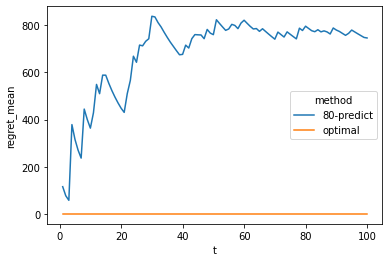

In [17]:
sns.lineplot(x="t",y="regret_mean",data=df,hue="method")

<AxesSubplot:xlabel='t', ylabel='cost_acc'>

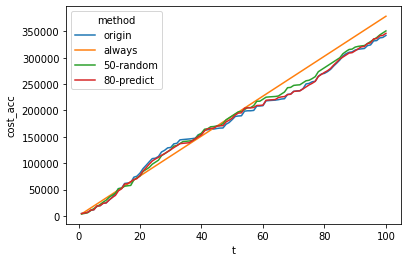

In [93]:
sns.lineplot(x="t",y="cost_acc",data=df,hue="method")

3      False
8      False
13     False
18     False
23     False
       ...  
478    False
483    False
488     True
493     True
498     True
Name: buy, Length: 100, dtype: bool